# лекция 2

## pandas
## Dataframe


- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# магическая функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Загрузим данные и посмотрим на них.

In [3]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:

In [31]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,4.285714
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,3.285714
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,3.000000
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,3.285714
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,3.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:

In [5]:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Для вывода названий всех признаков есть специальная функция:

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Как получить таблицу без последней колонки?

In [36]:
data[data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data.iloc[:, :-1].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [9]:
data.loc[:, data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Посмотрим, есть ли в данных пропуски:

In [10]:
data.isnull().any().any()

False

Итак, пропусков нет.

Можно вывести статистику по значениям признаков:
Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [33]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,1.712477
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.918375
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.285714
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.285714
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,5.000000


In [35]:
data.describe(include=['object', 'bool'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Более подробное описание значений признаков (количество непустых значений, типов столбцов и объема занимаемой памяти):

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Какие значения принимает признак `guardian`?

In [13]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [14]:
data['guardian'].nunique()

3

In [15]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [16]:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15


Работа с признаками - очень важный этап решения задачи. Помимо имеющихся признаков, можно создавать новые, которые могут оказаться полезными для построения качественного алгоритма. Например, внимательно изучив описания признаков, связанных с алкоголем, создадим признак "alc", который будет отражать общее употребление алкоголя в течение недели по формуле ниже:

$$
alc = \frac{5\times Dalc + 2 \times Walc}{7}
$$

In [17]:
data['alc'] = (5 * data['Dalc'] + 2 * data['Walc']) / 7

In [18]:
data[['Walc', 'Dalc', 'alc']].head()

,Walc,Dalc,alc
0,1,1,1.000000
1,1,1,1.000000
2,3,2,2.285714
3,1,1,1.000000
4,2,1,1.285714


Проанализируем взаимосвязь употребления алкоголя и успехов в учебе детальнее. Посмотрим на распределение употребления алкоголя у студентов:

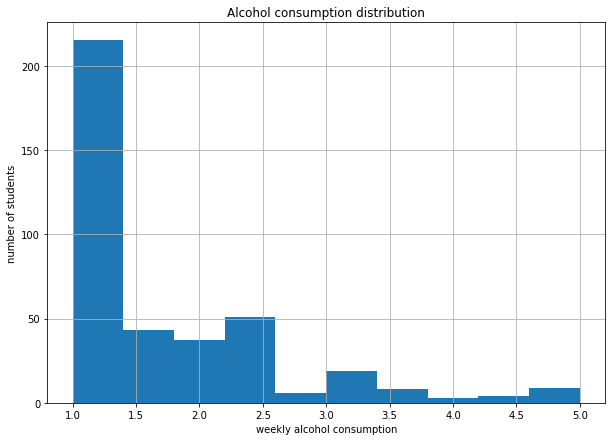

In [19]:
plt.figure(figsize=(10,7))
plt.title('Alcohol consumption distribution')
data['alc'].hist()
plt.xlabel('weekly alcohol consumption')
plt.ylabel('number of students')
plt.show()

Посмотрим на среднее употребление алкоголя:

In [20]:
data['alc'].mean()

1.7124773960217012

Итак, из гистограммы и полученного значения можно сделать вывод, что в среднем студенты употребляют алкоголь относительно редко. Теперь посмотрим на влияние употребления алкоголя в выходные и будни на итоговую оценку. Для этого разделим студентов на две части: те, чье употребление алкоголя меньше среднего, и те, у кого оно не меньше среднего. Начнем с выходных.

In [23]:
weekend_sober = data[data['Walc'] < data['Walc'].mean()]
weekend_drunk = data[data['Walc'] >= data['Walc'].mean()]

In [24]:
weekend_sober.shape, weekend_drunk.shape

((236, 34), (159, 34))

Посчитаем среднее значение целевой переменной для каждой части.

In [25]:
weekend_sober_g3 = weekend_sober['G3'].mean()
weekend_drunk_g3 = weekend_drunk['G3'].mean()
print(weekend_sober_g3, weekend_drunk_g3)

10.5 10.28930817610063


Итак, средние оценки примерно одинаковы - у тех, кто употребляет больше алкоголя в выходные, она чуть хуже. Теперь перейдем к будним дням.

In [26]:
workday_sober = data[data['Dalc'] < data['Dalc'].mean()]
workday_drunk = data[data['Dalc'] >= data['Dalc'].mean()]

In [27]:
workday_sober.shape, workday_drunk.shape

((276, 34), (119, 34))

In [28]:
workday_sober_g3 = workday_sober['G3'].mean()
workday_drunk_g3 = workday_drunk['G3'].mean()
print(workday_sober_g3, workday_drunk_g3)

10.731884057971014 9.680672268907562


По сравнению с выходными, разница между средними оценками сильно увеличилась и стала больше одного балла.

Из подобного краткого анализа можно сделать предварительное предположение (которое, разумеется, нужно еще статистически проверить) о том, что алкоголь влияет на успехи в учебе: те, кто употребляет больше алкоголя в будние дни, учится хуже, чем те, кто лучше себя в этом плане контролирует. Это наблюдение можно интерпретировать: в будни учеба особенно интенсивна, поэтому употребление алкоголя в эти дни мешает учиться, в отличие от выходных, когда можно отдохнуть.

Также данные можно исследовать с помощью группировки и агрегирования. Например, найдем исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [29]:
data_by_school = data.groupby('school')
data_by_school.describe()

age                                                       Medu  \
        count       mean       std   min    25%   50%   75%   max  count   
school                                                                     
GP      349.0  16.521490  1.216610  15.0  16.00  16.0  17.0  22.0  349.0   
MS       46.0  18.021739  0.881643  17.0  17.25  18.0  18.0  21.0   46.0   

                  ...     G3          alc                                     \
            mean  ...    75%   max  count      mean       std  min       25%   
school            ...                                                          
GP      2.802292  ...  14.00  20.0  349.0  1.677446  0.903404  1.0  1.000000   
MS      2.347826  ...  12.75  19.0   46.0  1.978261  0.995667  1.0  1.285714   

                            
             50%  75%  max  
school                      
GP      1.285714  2.0  5.0  
MS      1.571429  2.5  5.0  

[2 rows x 136 columns]

Теперь посмотрим на среднее значение признаков для каждой школы:

In [30]:
data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
school,,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971,1.677446
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826,1.978261


## Задания для самостоятельного решения дома(2 балла)

1. Получите таблицу со студентами с четными номерами.
2. Получите таблицу со студентами, имеющими четное число пропусков.
3. Верно ли, что студенты, имеющие больше 10 пропусков, учатся хуже, чем остальные?
4. Как вы думаете, какие еще признаки могут повлиять на итоговую оценку? Найдите закономерности, аналогичные рассмотренным.
5. Как вы думаете, если при школе откроется общежитие, насколько актуально это будет для студентов математического класса?
6. Найдите в данных закономерности с помощью группировки.

Просмотреть все датасеты в папке Datasets, каждый в отдельности загрузить в блокноты,сделать описание датасетов(можно найти в kaggle), вывести всю необходимую информацию о содержании , размерах, статистику, обработать пропущенные результаты, категориальные данные. Каждый результат выгружать и сохранять в новом dataframe.


##### 1. Получите таблицу со студентами с четными номерами

In [13]:
df1 = data.loc[::2]
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


##### 2. Получите таблицу со студентами, имеющими четное число пропусков.

In [15]:
df2 = data[(data['absences'] % 2 == 0)]
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,2,10,9,10
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0


##### 3.Верно ли, что студенты, имеющие больше 10 пропусков, учатся хуже, чем остальные?

In [34]:
def mean_value_G3(group1, group2) :
    if group1['G3'].mean() > group2['G3'].mean():
        print('Студенты, имеющие больше 10 пропусков, не учатся хуже остальных.')
    else:
        print('Cтуденты, имеющие больше 10 пропусков, учатся хуже остальных.')
        
mean_value_G3(data[data['absences'] > 10], data[data['absences'] <= 10])

Cтуденты, имеющие больше 10 пропусков, учатся хуже остальных.


##### 4.Как вы думаете, какие еще признаки могут повлиять на итоговую оценку? Найдите закономерности, аналогичные рассмотренным.
###### 1) количество часов обучения в неделю - studytime(Хорошо ли посвещать учебе более 10 часов в неделю?)

In [35]:
if data[data['studytime'] == 4]['G3'].mean() > data[data['studytime'] < 4]['G3'].mean() :
    print('Студенты, уделяющие учебе больше 10 часов, учатся лучше')
else:
    print('Студенты, уделяющие учебе меньше 10 часов, учатся лучше')

Студенты, уделяющие учебе больше 10 часов, учатся лучше


###### 2) наличие романтических отношений - romantic

In [39]:
if data[data['romantic'] == 'yes']['G3'].mean() > data[data['romantic'] == 'no']['G3'].mean():
    print('Наличие отношений положительно сказывается на учебе')
else:
    print('Наличие отношений плохо сказывается на учебе')

Наличие отношений плохо сказывается на учебе


###### 3) дополнительные платные занятия -paid и внеклассная деятельность - activities (Помогает ли внеклассное развитие в учебе?)

In [45]:
act = data[(data['activities'] == 'yes') | (data['paid'] == 'yes')]
no_act = data[(data['activities'] == 'no') & (data['paid'] == 'no')]

if act['G3'].mean() > no_act['G3'].mean():
    print('Всестороннeе развитие помогает в учебе')
else: 
    print('Всестороннее развитие не особо помогает в учебе')

Всестороннeе развитие помогает в учебе


###### 4) посещение детского сада - nursery (В детском саду закладывается основа, с которой детки потом идут в школу, поэтому садик - это один из самых важных ступеней жизни. А влияет ли сад на учебу?)

In [48]:
if data[data['nursery'] == 'yes']['G3'].mean() > data[data['nursery'] == 'no']['G3'].mean():
    print('Студенты, посетившие сад, учатся лучше')
else:
    print('Студенты, не посетившие сад, учатся лучше')

Студенты, посетившие сад, учатся лучше


##### 5. Как вы думаете, если при школе откроется общежитие, насколько актуально это будет для студентов математического класса?

In [55]:
#traveltime - время в пути от дома до учебы
if len(data[data['traveltime'] > 1]) > len(data[data['traveltime'] == 1]) :
    print('Актуально')
else:
    print('Неактульно')

Неактульно


##### 6.Найдите в данных закономерности с помощью группировки.

In [62]:
 data.groupby('Pstatus').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Pstatus,,,,,,,,,,,,,,,,
A,16.585366,3.146341,2.804878,1.390244,1.975610,0.341463,3.878049,3.121951,3.097561,1.560976,2.268293,3.463415,8.878049,11.073171,11.170732,11.195122
T,16.709040,2.703390,2.488701,1.454802,2.042373,0.333333,3.951977,3.248588,3.110169,1.471751,2.293785,3.564972,5.341808,10.889831,10.661017,10.324859


In [65]:
data.groupby('G3').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
G3,,,,,,,,,,,,,,,
0,17.078947,2.315789,2.289474,1.605263,1.973684,0.921053,3.842105,3.131579,3.210526,1.342105,1.921053,3.605263,0.000000,7.526316,4.657895
4,17.000000,4.000000,3.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000,2.000000,4.000000,1.000000,22.000000,6.000000,6.000000
5,16.714286,2.714286,2.571429,1.142857,1.428571,1.000000,3.714286,4.142857,4.000000,2.285714,3.428571,3.714286,11.428571,5.857143,5.428571
6,16.333333,2.733333,2.266667,1.533333,1.933333,0.000000,4.000000,3.066667,3.266667,1.133333,1.666667,3.666667,8.066667,6.800000,6.133333
7,17.000000,2.777778,2.000000,1.666667,1.888889,1.444444,4.111111,3.444444,3.333333,1.555556,2.777778,4.000000,6.777778,7.222222,7.333333
8,17.218750,2.531250,2.375000,1.500000,1.937500,0.625000,3.906250,3.281250,3.656250,1.656250,2.750000,3.656250,9.718750,7.750000,8.062500
9,17.178571,2.714286,2.500000,1.357143,2.071429,0.464286,3.857143,3.214286,3.250000,1.750000,2.357143,3.821429,10.142857,9.321429,8.928571
10,16.625000,2.535714,2.250000,1.678571,1.946429,0.357143,4.125000,3.178571,3.035714,1.535714,2.750000,3.303571,4.857143,9.410714,9.732143
11,16.617021,2.680851,2.659574,1.361702,2.148936,0.106383,3.851064,3.148936,2.978723,1.446809,2.148936,3.744681,7.510638,11.000000,10.914894


видим, что в среднем самые молодые студенты (age = 16.0) имеют наивысший итоговый балл, при этом это сказывается на их здоровье (health = 2.0)

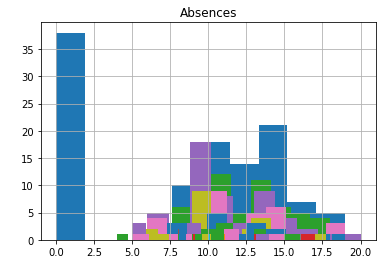

In [82]:
dt = data.groupby('absences')['G3']

plt.figure()
plt.title('Absences')
dt.hist()
plt.xlabel('')
plt.ylabel(' ')
plt.show()

на основе этих данных можем сказать, что, уделяя большое количество времени на учебу, высокого результат добиться нельзя. 